In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
diabetes_data = pd.read_csv('diabetes_processed.csv')

diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.0,155.548223,33.6,0.627,50.0,1
1,1.0,85.0,66.000000,29.0,155.548223,26.6,0.351,31.0,0
2,8.0,183.0,64.000000,32.0,155.548223,23.3,0.672,32.0,1
3,1.0,89.0,66.000000,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.000000,35.0,168.000000,43.1,2.288,33.0,1
5,5.0,116.0,74.000000,32.0,155.548223,25.6,0.201,30.0,0
6,3.0,78.0,50.000000,32.0,88.000000,31.0,0.248,26.0,1
7,10.0,115.0,72.405184,32.0,155.548223,35.3,0.134,29.0,0
8,2.0,197.0,70.000000,45.0,543.000000,30.5,0.158,53.0,1
9,8.0,125.0,96.000000,32.0,155.548223,32.0,0.232,54.0,1


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.405184,29.994792,155.548223,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096346,8.886506,85.021108,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,32.000000,155.548223,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Scaling our dataset, except for the target column(outcome). Most machine Learning classifiers prefer this.

In [6]:
cols_to_norm=list(diabetes_data.columns[:-1])
cols_to_norm

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [7]:
from sklearn.preprocessing import StandardScaler
diabetes_data[cols_to_norm]=StandardScaler().fit_transform(diabetes_data[cols_to_norm])

In [8]:
#View the final scaled Data
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.033518,0.563604,-3.345079e-16,0.167240,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.529859,-0.112017,-3.345079e-16,-0.851551,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.695306,0.225793,-3.345079e-16,-1.331838,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.529859,-0.787638,-7.243887e-01,-0.633239,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.680669,0.563604,1.465506e-01,1.549885,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.297376,2.027450,2.877840e-01,0.065361,-0.908682,2.532136,0
764,-0.547919,0.011301,-0.198965,-0.337224,-3.345079e-16,0.632973,-0.398282,-0.531023,0
765,0.342981,-0.021574,-0.033518,-0.787638,-5.125386e-01,-0.909768,-0.685193,-0.275760,0
766,-0.844885,0.142800,-1.026200,0.225793,-3.345079e-16,-0.342155,-0.371101,1.170732,1


## Implementing Multiple Machine Learning Algorithms on the Dataset

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',probability=True)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

In [10]:
#x are alll our features (after droping our target 'Outcome')
# y is the target we are trying to predict (that is Outcome)
x= diabetes_data.drop(columns=['Outcome'])
y=diabetes_data['Outcome']

In [18]:
# Split our datast into two:

#1. Training data to train all our classifiers on real data and 
#2. Test data to evaluate their performance on unseen data

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=4)

#Test size is 0.2 means we would be training each of our classifiers with 80% of
# and validating them with the remaining 20%

#x_train - 80% fraction of our features for training our classifiers algorithms
#y_train - 80% fraction of the matching target for traininig our classifiers algorithms

#x_test - 20% hold-out fraction of our features for testing the performance of
#from the training phase above by producinn - "y_pred".

#y_test - 20% hold_out fraction of our matching target. This is used in comparison

#Random State guarantees that same sequence of random numbers are generated for

In [19]:
x_train.shape, x_test.shape

((614, 8), (154, 8))

In [20]:
y_train.shape, y_test.shape

((614,), (154,))

In [21]:
#Define the Machine Learning Classifiers (all coming from Sci-kit Learn Library except xgboost (though has a scikit-learn wrapper))
lr = LogisticRegression()
gs = GaussianNB()
sv =SVC(kernel='rbf', random_state =0)
gb =GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)
kn=KNeighborsClassifier(n_neighbors=18)
ad=AdaBoostClassifier(n_estimators=100, random_state=0)
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(n_estimators=70)
xg = XGBClassifier()

# 'gb','rf' and 'ad' are the ensemble algorithms in the above representation

In [22]:
#Fit function trains all our machine learning classifiers on 80% of our data.
lr.fit(x_train, y_train);
gs.fit(x_train, y_train);
svclassifier.fit(x_train, y_train);
gb.fit(x_train, y_train);
kn.fit(x_train, y_train);
ad.fit(x_train, y_train);
dt.fit(x_train, y_train);
rf.fit(x_train, y_train);
xg.fit(x_train, y_train);

C:\Users\SugarIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
#Get individual classifiers training scores
print('Training_score: ',lr.score(x_train,y_train))
print('Training_score: ',gs.score(x_train,y_train))
print('Training_score: ',svclassifier.score(x_train,y_train))
print('Training_score: ',gb.score(x_train,y_train))
print('Training_score: ',kn.score(x_train,y_train))
print('Training_score: ',ad.score(x_train,y_train))
print('Training_score: ',dt.score(x_train,y_train))
print('Training_score: ',rf.score(x_train,y_train))
print('Training_score: ',xg.score(x_train,y_train))

#The Decision tree, random forest and xgboost is over-fitting our data. The best training

#The Gradient Boosting Classifier is an ensemble ML that works by combining many
#to create a strong predictive model (by aggregating the output from many models)

Training_score:  0.7654723127035831
Training_score:  0.752442996742671
Training_score:  0.7687296416938111
Training_score:  0.9332247557003257
Training_score:  0.7882736156351792
Training_score:  0.8469055374592834
Training_score:  1.0
Training_score:  1.0
Training_score:  1.0


Accuracy of the GBM on training set: 0.93


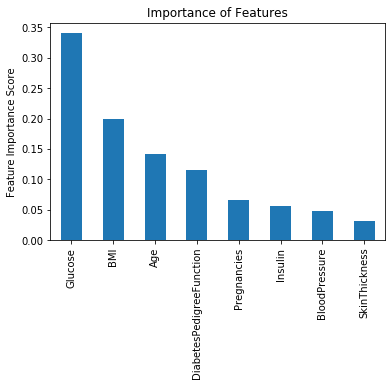

In [24]:
# Get important features in the training set using our best model - Gradient Boosting Classifier
predictors =list(x_train)
feat_imp=pd.Series(gb.feature_importances_,predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar',title='Importance of Features')
plt.ylabel('Feature Importance Score')

#Reprint accuracy of Gradient Boosting in the training phase.
print('Accuracy of the GBM on training set: {:.2f}'.format(gb.score(x_train,y_train)))

#Glucose, BMI and Age are the only important features,
#but Boosting help us to combine the other weak learners into a single strong learners

In [32]:
# Predict targets for unseen dataset (x_test) by using all our classifiers
y_pred1 = lr.predict(x_test)
y_pred2 = gs.predict(x_test)
y_pred3 = svclassifier.predict(x_test)
y_pred4 = gb.predict(x_test)
y_pred5 = kn.predict(x_test)
y_pred6 = ad.predict(x_test)
y_pred7 = dt.predict(x_test)
y_pred8 = rf.predict(x_test)
y_pred9 = xg.predict(x_test)

In [33]:
# Get accuracy score which show the predictive power of each classifier at class
print('Testing_Score: ',accuracy_score(y_test,y_pred1))
print('Testing_Score: ',accuracy_score(y_test,y_pred2))
print('Testing_Score: ',accuracy_score(y_test,y_pred3))
print('Testing_Score: ',accuracy_score(y_test,y_pred4))
print('Testing_Score: ',accuracy_score(y_test,y_pred5))
print('Testing_Score: ',accuracy_score(y_test,y_pred6))
print('Testing_Score: ',accuracy_score(y_test,y_pred7))
print('Testing_Score: ',accuracy_score(y_test,y_pred8))
print('Testing_Score: ',accuracy_score(y_test,y_pred9))

#Gradient Boosting Classifier end up

Testing_Score:  0.7922077922077922
Testing_Score:  0.7662337662337663
Testing_Score:  0.7987012987012987
Testing_Score:  0.7857142857142857
Testing_Score:  0.7922077922077922
Testing_Score:  0.7727272727272727
Testing_Score:  0.7012987012987013
Testing_Score:  0.7532467532467533
Testing_Score:  0.7402597402597403


From the above testing scores, we can see that Logistic Regression and Support Vector Classifier performs better than the Gradient Boosting Classifier

In [27]:
#Extract the predictions into a dataframe
gb_results =pd.DataFrame({'y_test':y_test,'y_pred':y_pred4})

gb_results

,y_test,y_pred
390,0,0
146,0,0
136,0,0
420,0,1
328,1,0
...,...,...
374,0,0
288,0,0
282,0,0
754,1,1


In [28]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred4)
print(cf_matrix)

[[86 16]
 [17 35]]


#### k-fold Cross Validation using the Gradient Boosting Classifier

K- fold Cross Validation(CV) divide the data into folds and ensure that each fold is used as a testing set at some point. (This ensures all folds have equal chance of featuring as test st and train set at some point).

In [29]:
# Evaluate the Gradient Boosting Classifier with k-fold Cross Validation
kfold = KFold(n_splits=10,random_state=None)
results=cross_val_score(gb,x,y,cv=kfold)
print('Accuracy: %.2f%% (%.2f%%)'%(results.mean()*100,results.std()*100))

Accuracy: 76.95% (5.83%)


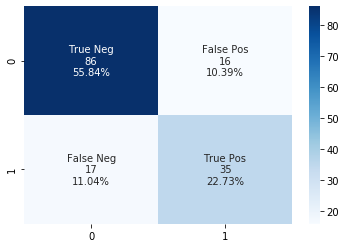

In [30]:
#Use Seaborn to get a Graphical Confusion Martrix for our best Machine Learning classifier

group_names =['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]

group_percentages =['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

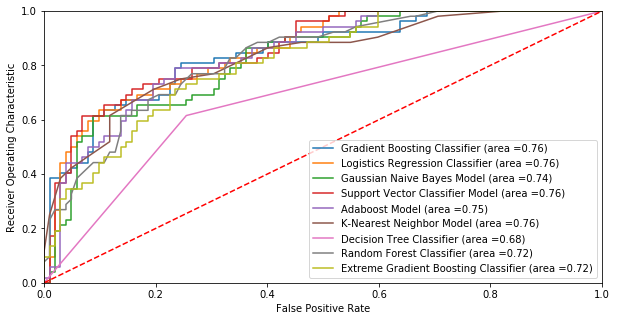

In [37]:
#Calculate values for ROC AUC plot
gb_roc_auc =roc_auc_score(y_test,gb.predict(x_test))
fprgb, tprgb, thresholdsgb =roc_curve(y_test, gb.predict_proba(x_test)[:,1])

lr_roc_auc =roc_auc_score(y_test,lr.predict(x_test))
fprlr, tprlr, thresholdlsr =roc_curve(y_test, lr.predict_proba(x_test)[:,1])

gs_roc_auc =roc_auc_score(y_test,gs.predict(x_test))
fprgs, tprgs, thresholdlgs =roc_curve(y_test, gs.predict_proba(x_test)[:,1])

ad_roc_auc =roc_auc_score(y_test,ad.predict(x_test))
fprad, tprad, thresholdlad =roc_curve(y_test, ad.predict_proba(x_test)[:,1])

kn_roc_auc =roc_auc_score(y_test,lr.predict(x_test))
fprkn, tprkn, thresholdlkn =roc_curve(y_test, kn.predict_proba(x_test)[:,1])

dt_roc_auc =roc_auc_score(y_test,dt.predict(x_test))
fprdt, tprdt, thresholdldt =roc_curve(y_test, dt.predict_proba(x_test)[:,1])

rf_roc_auc =roc_auc_score(y_test,rf.predict(x_test))
fprrf, tprrf, thresholdsrf =roc_curve(y_test, rf.predict_proba(x_test)[:,1])

svclassifier_roc_auc =roc_auc_score(y_test,svclassifier.predict(x_test))
fprsv, tprsv, thresholdlssv =roc_curve(y_test, svclassifier.predict_proba(x_test)[:,1])

xg_roc_auc =roc_auc_score(y_test,rf.predict(x_test))
fprxg, tprxg, thresholdsxg =roc_curve(y_test, xg.predict_proba(x_test)[:,1])


plt.figure(figsize=(10,5))
plt.plot(fprgb, tprgb, label='Gradient Boosting Classifier (area =%0.2f)' % gb_roc_auc)
plt.plot(fprlr, tprlr, label='Logistics Regression Classifier (area =%0.2f)' % lr_roc_auc)
plt.plot(fprgs, tprgs, label='Gaussian Naive Bayes Model (area =%0.2f)' % gs_roc_auc)
plt.plot(fprsv, tprsv, label='Support Vector Classifier Model (area =%0.2f)' % svclassifier_roc_auc)
plt.plot(fprad, tprad, label='Adaboost Model (area =%0.2f)' % ad_roc_auc)
plt.plot(fprkn, tprkn, label='K-Nearest Neighbor Model (area =%0.2f)' % kn_roc_auc)
plt.plot(fprdt, tprdt, label='Decision Tree Classifier (area =%0.2f)' % dt_roc_auc)
plt.plot(fprrf, tprrf, label='Random Forest Classifier (area =%0.2f)' % rf_roc_auc)
plt.plot(fprxg, tprxg, label='Extreme Gradient Boosting Classifier (area =%0.2f)' % xg_roc_auc)


plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylabel('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

ROC AUC: It tells how much a model is capable of separating classes.
The Higher the AUC, the better